# Assignment Number 4 (Last One)

In [107]:
import warnings
warnings.filterwarnings('ignore')

# First Question

### Using Single-Link
#### Will focus on smallest 2 attributes distance, will find that smallest two are first 2 points, which are 0 and , so by merging them result will be 
#### ((0,1) , 2)
### so will firstly make 
### Using Complete-Link
#### Will focus on Max 2 attributes distance by focusing in smallest 2 and compare it with all, so smallest 2 are 0 and 1 together, compared with distnace between(2,0) then (2,1) will be max(3,4) = 4, then will find that will perform the same result as single with
#### ((0,1) , 2)
### so will firstly make 

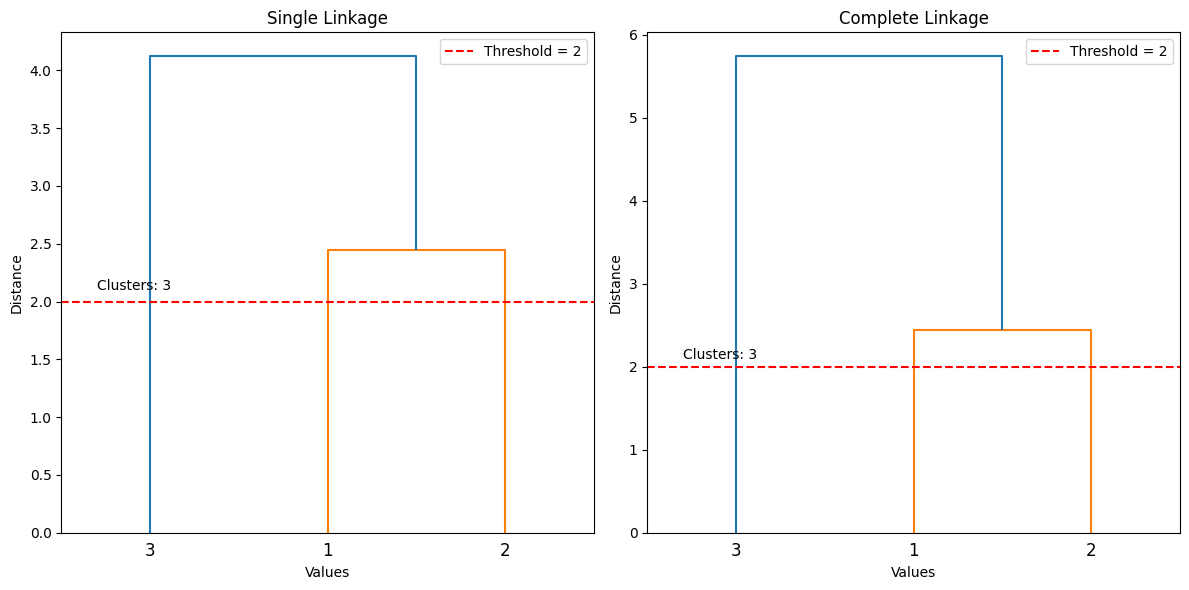

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Given dissimilarity matrix
P_X = np.array([[0, 1, 4], [1, 0, 2], [4, 2, 0]])
threshold = int(input("Set Threshold for proper: "))

# Perform hierarchical clustering using single linkage
Z_single = linkage(P_X, method="single")

# Perform hierarchical clustering using complete linkage
Z_complete = linkage(P_X, method="complete")

# Use fcluster to assign cluster labels based on the threshold
clusters_single = fcluster(Z_single, t=threshold, criterion="distance")
clusters_complete = fcluster(Z_complete, t=threshold, criterion="distance")

# Plot dendrogram for single linkage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(Z_single, labels=["1", "2", "3"])
plt.title("Single Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
plt.text(2, threshold + 0.1, f"Clusters: {clusters_single[-1]}", color="black")

# Plot dendrogram for complete linkage
plt.subplot(1, 2, 2)
dendrogram(Z_complete, labels=["1", "2", "3"])
plt.title("Complete Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
plt.text(2,threshold + 0.1, f"Clusters: {clusters_complete[-1]}", color="black")

plt.tight_layout()
plt.show()

In [109]:
# Calculate Euclidean distances without using np.linalg.norm
distance_to_C1 = np.sqrt((P_X[2, 0] - P_X[0, 0]) ** 2 + (P_X[2, 1] - P_X[0, 1]) ** 2)
distance_to_C2 = np.sqrt((P_X[2, 0] - P_X[1, 0]) ** 2 + (P_X[2, 1] - P_X[1, 1]) ** 2)

# Create a DataFrame for the distances
distances_df = pd.DataFrame(
    {"Cluster C1": [distance_to_C1], "Cluster C2": [distance_to_C2]}
)

# Print the distances DataFrame
print("Euclidean Distances:")
print(distances_df)

# Determine cluster membership
belongs_to_C1 = distance_to_C1 < distance_to_C2

# Print the cluster membership
cluster_membership = (
    "Belongs to Cluster C1" if belongs_to_C1 else "Belongs to Cluster C2"
)
print("Cluster Membership:", cluster_membership)

# Accessing hard membership for a specific object (e.g., object with index 2)
object_index = 2
hard_membership_for_object = "C1" if belongs_to_C1 else "C2"
print(f"Hard Membership for Object {object_index}: {hard_membership_for_object}")

Euclidean Distances:
   Cluster C1  Cluster C2
0    4.123106    3.605551
Cluster Membership: Belongs to Cluster C2
Hard Membership for Object 2: C2


In [137]:
import numpy as np
import pandas as pd
from scipy.spatial import distance

# Given points
X1 = np.array([1, 3])
X2 = np.array([2, 5])
X3 = np.array([3, 7])

# Given clusters
C1 = np.array([0, 1, 4])
C2 = np.array([1, 0, 2])

# Create an array with all the points
points = np.array([X1, X2, X3])

# Compute the pairwise distances using cdist
idx_points = ["X1", "X2", "X3"]
idx_clusters = ["C1", "C2"]
distance_matrix_df = pd.DataFrame(
    distance.cdist(points, points), index=idx_points, columns=idx_points
)

# Print the distance matrix
print(f"Pairwise Distances:\n{distance_matrix_df}")

# Calculate distances and assign membership
hard_membership_matrix = distance.cdist(
    [C1, C2], distance_matrix_df, metric="euclidean"
)
hard_membership_matrix_df = pd.DataFrame(
    hard_membership_matrix.T, index=idx_points, columns=idx_clusters
)
# Add a new column 'Position' based on the cluster with minimum distance
hard_membership_matrix_df["Position"] = np.where(
    hard_membership_matrix_df["C1"] < hard_membership_matrix_df["C2"], "C1", "C2"
)
print(hard_membership_matrix_df)
# Calculate new means for C1 and C2 based on cluster assignments
new_C1 = np.mean(points[hard_membership_matrix_df["Position"] == "C1"], axis=0)
new_C2 = np.mean(points[hard_membership_matrix_df["Position"] == "C2"], axis=0)

# Print the new centroids for C1 and C2
print(f"\nNew Centroid for C1: {new_C1}")
print(f"New Centroid for C2: {new_C2}")

Pairwise Distances:
          X1        X2        X3
X1  0.000000  2.236068  4.472136
X2  2.236068  0.000000  2.236068
X3  4.472136  2.236068  0.000000
          C1        C2 Position
X1  1.323169  3.480152       C1
X2  3.018519  1.258409       C2
X3  6.125999  4.588652       C2

New Centroid for C1: [1. 3.]
New Centroid for C2: [2.5 6. ]


# Second Question

In [111]:
import numpy as np
from sklearn.cluster import DBSCAN

data = np.array([[1, 1, 0], [1, 2, 0], [1, 3, 0], [2, 2, 0], [3, 3, 0], [3, 4, 0], [4, 3, 0], [4, 4, 0]])

# Perform DBSCAN clustering
eps = 1.0
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data)

# Print the cluster labels
for i, label in enumerate(labels):
    print(f"Point {data[i]} is assigned to cluster {label}")

Point [1 1 0] is assigned to cluster 0
Point [1 2 0] is assigned to cluster 0
Point [1 3 0] is assigned to cluster 0
Point [2 2 0] is assigned to cluster 0
Point [3 3 0] is assigned to cluster 1
Point [3 4 0] is assigned to cluster 1
Point [4 3 0] is assigned to cluster 1
Point [4 4 0] is assigned to cluster 1


# Third Question

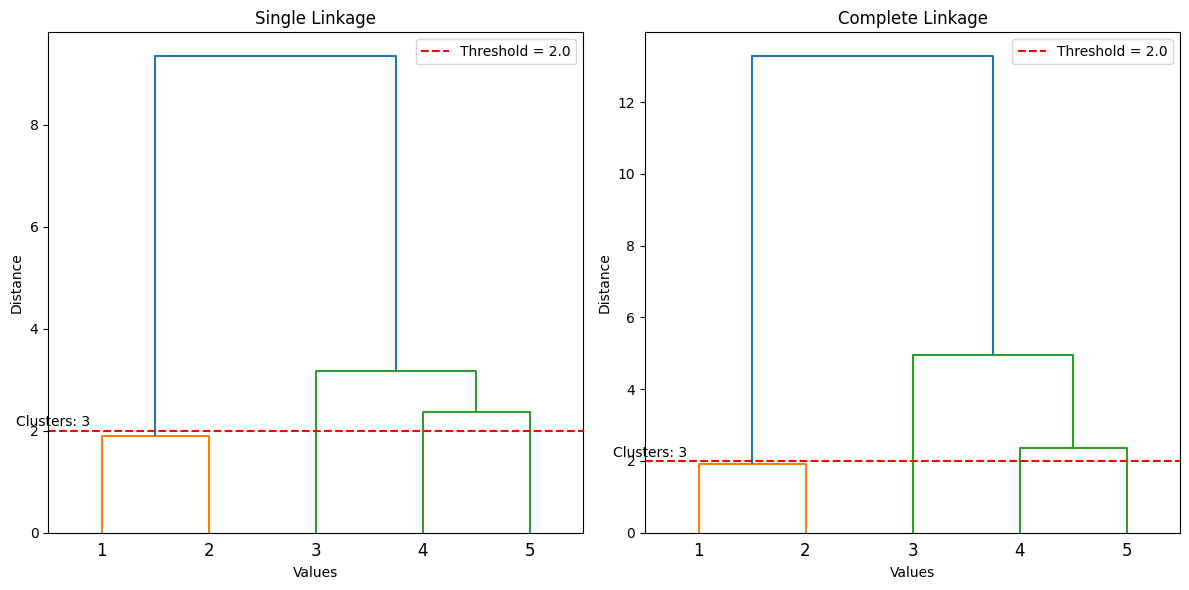

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Updated dissimilarity matrix
P_X = np.array(
    [
        [0, 1, 5, 6.4, 7.4],
        [1, 0, 4.2, 5.7, 6.7],
        [5, 4.2, 0, 1.4, 2.5],
        [6.4, 5.7, 1.4, 0, 1.1],
        [7.4, 6.7, 2.5, 1.1, 0],
    ]
)

threshold = float(input("Set Threshold for proper: "))

# Perform hierarchical clustering using single linkage
Z_single = linkage(P_X, method="single")

# Perform hierarchical clustering using complete linkage
Z_complete = linkage(P_X, method="complete")

# Use fcluster to assign cluster labels based on the threshold
clusters_single = fcluster(Z_single, t=threshold, criterion="distance")
clusters_complete = fcluster(Z_complete, t=threshold, criterion="distance")

# Plot dendrogram for single linkage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(Z_single, labels=["1", "2", "3", "4", "5"])
plt.title("Single Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
# Center the text on the x-axis
plt.text(
    0.5, threshold + 0.1, f"Clusters: {clusters_single[-1]}", color="black", ha="center"
)

# Plot dendrogram for complete linkage
plt.subplot(1, 2, 2)
dendrogram(Z_complete, labels=["1", "2", "3", "4", "5"])
plt.title("Complete Linkage")
plt.xlabel("Values")
plt.ylabel("Distance")
# Draw a horizontal line at the specified threshold
plt.axhline(y=threshold, color="r", linestyle="--", label=f"Threshold = {threshold}")
plt.legend()
# Center the text on the x-axis
plt.text(
    0.5,
    threshold + 0.1,
    f"Clusters: {clusters_complete[-1]}",
    color="black",
    ha="center",
)

plt.tight_layout()
plt.show()

# Eighth Question  

In [1]:
# Given test data
test_data = [
    [65, 57, 54, 1],
    [45, 65, 48, -1],
    [70, 46, 62, -1],
    [48, 91, 87, 1],
    [61, 33, 38, 1],
    [66, 59, 76, -1],
    [58, 84, 53, 1]
]

# Model M1
TP_M1 = sum(1 for a, b, c, cls in test_data if a > 60 and b > 60 and cls == 1)
TN_M1 = sum(1 for a, b, c, cls in test_data if not (a > 60 and b > 60) and cls == -1)
FP_M1 = sum(1 for a, b, c, cls in test_data if not (a > 60 and b > 60) and cls == 1)
FN_M1 = sum(1 for a, b, c, cls in test_data if a > 60 and b > 60 and cls == -1)

# Model M2
TP_M2 = sum(1 for a, b, c, cls in test_data if a > 55 and c > 65 and cls == 1)
TN_M2 = sum(1 for a, b, c, cls in test_data if not (a > 55 and c > 65) and cls == -1)
FP_M2 = sum(1 for a, b, c, cls in test_data if not (a > 55 and c > 65) and cls == 1)
FN_M2 = sum(1 for a, b, c, cls in test_data if a > 55 and c > 65 and cls == -1)

# Calculating Accuracy, Sensitivity, Specificity for M1
accuracy_M1 = (TP_M1 + TN_M1) / len(test_data)
sensitivity_M1 = TP_M1 / (TP_M1 + max(FN_M1, 1))  # Avoiding division by zero by using max(FN_M1, 1)
specificity_M1 = TN_M1 / (TN_M1 + FP_M1)

# Calculating Accuracy, Sensitivity, Specificity for M2
accuracy_M2 = (TP_M2 + TN_M2) / len(test_data)
sensitivity_M2 = TP_M2 / (TP_M2 + max(FN_M2, 1))  # Avoiding division by zero by using max(FN_M2, 1)
specificity_M2 = TN_M2 / (TN_M2 + FP_M2)

# Displaying results for Model M1
print("Results for Model M1:")
print(f"Accuracy: {accuracy_M1:.2f}")
print(f"Sensitivity: {sensitivity_M1:.2f}")
print(f"Specificity: {specificity_M1:.2f}\n")

# Displaying results for Model M2
print("Results for Model M2:")
print(f"Accuracy: {accuracy_M2:.2f}")
print(f"Sensitivity: {sensitivity_M2:.2f}")
print(f"Specificity: {specificity_M2:.2f}")


Results for Model M1:
Accuracy: 0.43
Sensitivity: 0.00
Specificity: 0.43

Results for Model M2:
Accuracy: 0.29
Sensitivity: 0.00
Specificity: 0.33


# Ninth Question  

In [2]:
from sklearn.neighbors import KNeighborsRegressor

# Given data
data = [
    [25, 40000, 135],
    [35, 60000, 256],
    [45, 80000, 231],
    [20, 20000, 267],
    [35, 120000, 139],
    [52, 18000, 150],
    [23, 95000, 127],
    [40, 62000, 216],
    [60, 100000, 139],
    [48, 220000, 250],
    [33, 150000, 264]
]

# Test data (Age=38, Loan=$55,000)
test_point = [[38, 55000]]

# Extract features and target
X = [row[:-1] for row in data]
y = [row[-1] for row in data]

# Create kNN regressor model
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)

# Predict House Price Index
predicted_house_price = knn.predict(test_point)

print(f"Predicted House Price Index: {predicted_house_price[0]}")


Predicted House Price Index: 202.33333333333334


# Twelfth Question

In [3]:
import pandas as pd
import math

# Given training set
data = {
    'Income': ['95K', '120K', '140K', '80K', '160K', '100K', '90K', '75K', '170K', '125K'],
    'Marital Status': ['Married', 'Single', 'Single', 'Married', 'Divorced', 'Married', 'Single', 'Divorced', 'Divorced', 'Single'],
    'Refund': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No'],
    'Cheat': ['NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO']
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Calculate Entropy for 'Cheat' (Class Label)
def entropy(class_values):
    counts = class_values.value_counts(normalize=True)
    entropy_value = -sum(p * math.log2(p) for p in counts)
    return entropy_value

class_entropy = entropy(df['Cheat'])

# Calculate Information Gain for 'Refund' and 'Marital Status'
def information_gain(df, attribute, target):
    attribute_entropy = df.groupby(attribute)[target].apply(entropy)
    subset_sizes = df[attribute].value_counts(normalize=True)
    weighted_entropy = (subset_sizes * attribute_entropy).sum()
    return class_entropy - weighted_entropy

# Calculate Information Gain for 'Refund' and 'Marital Status'
gain_refund = information_gain(df, 'Refund', 'Cheat')
gain_marital_status = information_gain(df, 'Marital Status', 'Cheat')

print(f"Information Gain for Refund: {gain_refund}")
print(f"Information Gain for Marital Status: {gain_marital_status}")

Information Gain for Refund: 0.3958156020033584
Information Gain for Marital Status: 0.2812908992306927
